In [1]:
#load necessary libararies
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('final_data_2.csv',usecols=['user_id', 'total_clicks', 'total_sessions','total_bags','total_hotel_spend', 'total_flights_spend', 'ads_per_km', 'recency',
       'frequency','age',
       'gender', 'married', 'has_children', 'total_cancellation',
       'avg_session_time'])
pd.set_option('display.max_columns', None)
df1.head()

,user_id,total_clicks,total_sessions,total_bags,total_hotel_spend,total_flights_spend,ads_per_km,recency,frequency,age,gender,married,has_children,total_cancellation,avg_session_time
0,23557,82,8,0,3802,0.00,0.000000,14.0,2,64,F,1,0,0,76.625000
1,94883,73,8,1,130,864.09,0.000000,109.0,4,51,F,1,0,0,67.750000
2,101486,131,8,0,2199,189.91,0.000000,41.0,3,50,F,1,1,0,122.250000
3,101961,126,8,2,2429,1242.66,0.000727,36.0,10,43,F,1,0,0,117.750000
4,106907,240,8,10,8514,27804.12,0.000000,1.0,4,45,F,1,1,1,758.915066


In [3]:
df2=pd.read_csv('data5.csv')
df2.head()

,user_id,total_num_of_flight_discount,total_flight_bookings,avg_flight_discount_amount,median_flight_discount_amount,mode_flight_discount_amount,max_flight_discount_amount,min_flight_discount_amount,total_num_of_hotel_discount,total_hotel_bookings,avg_hotel_discount_amount,median_hotel_discount_amount,mode_hotel_discount_amount,max_hotel_discount_amount,min_hotel_discount_amount,total_num_of_flight_discount_discarded,avg_flight_discount_amount_discarded,total_num_of_hotel_discount_discarded,avg_hotel_discount_amount_discarded,flight_discount_leads_to_hotel_booking,hotel_discount_leads_to_flight_booking,total_travelled_miles,flight_plus_hotels,home_country,home_city,home_airport,flights_with_bags_morethan_seats,flights_with_morethan_onebag,average_nights
0,167852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.10,2.0,0.100,0.0,0.0,NaN,0,usa,tampa,MCF,NaN,NaN,NaN
1,181157,1.0,3.0,0.15,0.15,0.15,0.15,0.15,1.0,3.0,0.15,0.15,0.15,0.15,0.15,1.0,0.20,0.0,0.000,0.0,NaN,3640.372453,3,usa,houston,HOU,0.0,1.0,3.33
2,252835,1.0,5.0,0.30,0.30,0.30,0.30,0.30,0.0,4.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.0,0.050,NaN,0.0,9296.195562,4,usa,chicago,ORD,0.0,0.0,2.75
3,283325,1.0,1.0,0.10,0.10,0.10,0.10,0.10,0.0,2.0,0.00,0.00,0.00,0.00,0.00,1.0,0.05,1.0,0.100,0.0,0.0,2838.442947,1,usa,dallas,DAL,0.0,0.0,3.00
4,299476,0.0,1.0,0.00,0.00,0.00,0.00,0.00,0.0,1.0,0.00,0.00,0.00,0.00,0.00,2.0,0.20,2.0,0.125,0.0,0.0,1090.000407,1,usa,atlanta,ATL,0.0,0.0,1.00


In [4]:
df3=pd.read_csv('data_7.csv')
df3[(df3['flights_money_saved']>0)].sum()

user_id                935582447
flights_money_saved       140493
hotels_money_saved         73162
dtype: int64

In [5]:
df = pd.merge(df1, df2, on='user_id', how='inner')  
df.fillna(0,inplace=True)
df.shape

(5998, 43)

In [6]:
df = pd.merge(df, df3, on='user_id', how='inner')  
df.fillna(0,inplace=True)
df.shape

(5998, 45)

In [7]:
df=df[(df.frequency>0)]

In [8]:
#Fix Type Error
df['total_hotel_spend']=np.abs(df['total_hotel_spend'])
df['average_nights']=np.abs(df['average_nights'])

In [9]:
df['converted']=np.where(df['frequency']>0,1,0)
df['condition'] = np.where(
    (df['total_flights_spend'] == 0) & (df['total_hotel_spend'] == 0),
    0,
    np.where(
        (df['total_flights_spend'] > 0) & (df['total_hotel_spend'] > 0),
        3,
        np.where(
            (df['total_flights_spend'] > 0) & (df['total_hotel_spend'] == 0),
            1,
            2,
        )
    )
)
df['gender'] = df['gender'].map({'M': 1, 'F': 0, 'O': 1})

In [10]:
df['total_hotel_net_spend'] = df.total_hotel_spend-df.hotels_money_saved
df['total_flight_net_spend'] = df.total_flights_spend-df.flights_money_saved
df['total_net_spend']=df['total_hotel_net_spend']+df['total_flight_net_spend']
df['discount_hotel_propotion']=np.where(df['total_hotel_bookings']>0,df['total_num_of_hotel_discount']/df['total_hotel_bookings'],0)
df['discount_flight_propotion']=np.where(df['total_flight_bookings']>0,df['total_num_of_flight_discount']/df['total_flight_bookings'],0)
df['married&has_children']=df.married*df.has_children

In [11]:
label_encoder = LabelEncoder()

columns_to_encode = df.select_dtypes(include='object')

for column in columns_to_encode:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

df.drop(columns=columns_to_encode, inplace=True)

In [12]:
df.columns

Index(['user_id', 'total_clicks', 'total_sessions', 'total_bags',
       'total_hotel_spend', 'total_flights_spend', 'ads_per_km', 'recency',
       'frequency', 'age', 'gender', 'married', 'has_children',
       'total_cancellation', 'avg_session_time',
       'total_num_of_flight_discount', 'total_flight_bookings',
       'avg_flight_discount_amount', 'median_flight_discount_amount',
       'mode_flight_discount_amount', 'max_flight_discount_amount',
       'min_flight_discount_amount', 'total_num_of_hotel_discount',
       'total_hotel_bookings', 'avg_hotel_discount_amount',
       'median_hotel_discount_amount', 'mode_hotel_discount_amount',
       'max_hotel_discount_amount', 'min_hotel_discount_amount',
       'total_num_of_flight_discount_discarded',
       'avg_flight_discount_amount_discarded',
       'total_num_of_hotel_discount_discarded',
       'avg_hotel_discount_amount_discarded',
       'flight_discount_leads_to_hotel_booking',
       'hotel_discount_leads_to_flight_boo

In [13]:
quantiles = [0, 0.25, 0.5,0.75, 1.0]

# Perform quantile-based binning
df['total_clicks_b'] = pd.qcut(df['total_clicks'], q=quantiles, labels=False)
# df['total_hotel_spend_b'] = pd.qcut(df['total_hotel_spend'], q=quantiles, labels=False)
# df['total_flights_spend_b'] = pd.qcut(df['total_flights_spend'], q=quantiles, labels=False)
df['recency_b'] = pd.qcut(df['recency'], q=quantiles, labels=False)
df['frequency_b'] = pd.qcut(df['frequency'], q=quantiles, labels=False)
df['age_b'] = pd.qcut(df['age'], q=[0, 0.25,0.75, 1.0], labels=False)
df['avg_session_time_b'] = pd.qcut(df['avg_session_time'], q=quantiles, labels=False)
# df['total_flight_bookings_b'] = pd.qcut(df['total_flight_bookings'], q=[0, 0.25,0.75, 1.0], labels=False)
# df['avg_flight_discount_amount_b'] = pd.qcut(df['avg_flight_discount_amount'], q=[0,0.69,.88, 1.0], labels=False)

In [91]:
# df.groupby('avg_flight_discount_amount_b')['avg_flight_discount_amount'].agg(['min', 'max','count'])

,min,max,count
avg_flight_discount_amount_b,,,
0,0.000,0.00,3824
1,0.050,0.15,1257
2,0.167,0.50,461


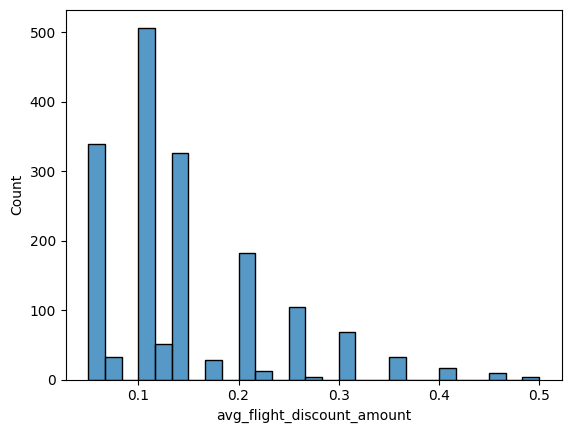

In [15]:
sns.histplot(df[(df.avg_flight_discount_amount>0)].avg_flight_discount_amount)
plt.show()

##### Free cancellation

In [16]:
df.condition.value_counts()

3    4946
2     362
1     234
Name: condition, dtype: int64

In [17]:
df.total_cancellation.value_counts()

0    4947
1     580
2      15
Name: total_cancellation, dtype: int64

In [18]:
df['cancellation_ratio']=df.total_cancellation/df.frequency

In [19]:
df[['cancellation_ratio','total_net_spend']].corr(method='kendall')

,cancellation_ratio,total_net_spend
cancellation_ratio,1.000000,0.192902
total_net_spend,0.192902,1.000000


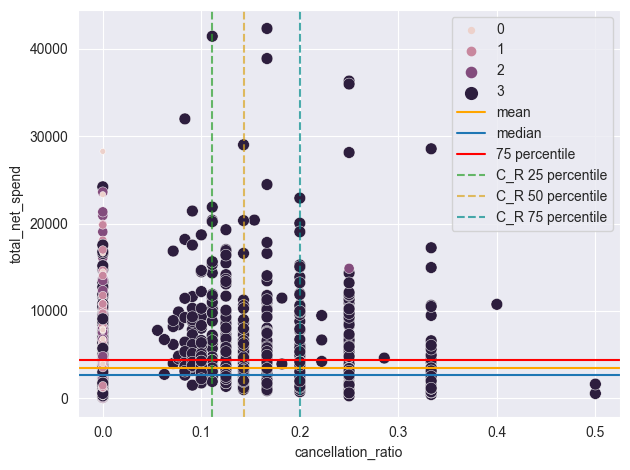

In [20]:
sns.set_style('darkgrid')
sns.scatterplot(x=df.cancellation_ratio,y=df.total_net_spend,hue=df.avg_session_time_b,size=df.avg_session_time_b)
plt.axhline(df.total_net_spend.mean(),color='orange',label='mean')
plt.axhline(df.total_net_spend.median(),label='median')
plt.axhline(np.percentile(df.total_net_spend,75),color='r',label='75 percentile')
plt.axvline(np.percentile(df[(df.cancellation_ratio>0)].cancellation_ratio,25),linestyle='--', alpha=0.7,color='tab:green',label='C_R 25 percentile')
plt.axvline(np.percentile(df[(df.cancellation_ratio>0)].cancellation_ratio,50),linestyle='--', alpha=0.7,color='goldenrod',label='C_R 50 percentile')
plt.axvline(np.percentile(df[(df.cancellation_ratio>0)].cancellation_ratio,75),linestyle='--', alpha=0.7,color='darkcyan',label='C_R 75 percentile')



# Show legend
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

- clients with cancellation ratio >0 belong to the highest avg_session_time category,so it will be meaningless to multby by avg_session_time_b to discrete feature.
- discretation maybe be improved by another feature like total_net spend(low frequency maybe indication of hesitiaon)

In [24]:
df[(df.cancellation_ratio>0)].cancellation_ratio.describe()

count    595.000000
mean       0.169196
std        0.073191
min        0.055556
25%        0.111111
50%        0.142857
75%        0.200000
max        0.500000
Name: cancellation_ratio, dtype: float64

In [25]:
df['cancellation_ratio_b']=pd.qcut(df[(df.cancellation_ratio>0)].cancellation_ratio,q=[0,.5,1],labels=[1,2])
df.cancellation_ratio_b=df.cancellation_ratio_b.astype(float)
df.fillna(0,inplace=True)

In [26]:
df.cancellation_ratio_b.value_counts()

0.0    4947
1.0     315
2.0     280
Name: cancellation_ratio_b, dtype: int64

##### Free Hotel Meal

In [27]:
df.average_nights.describe()

count    5542.000000
mean        3.719040
std         2.946066
min         0.000000
25%         2.000000
50%         3.000000
75%         4.950000
max        30.000000
Name: average_nights, dtype: float64

In [28]:
df.average_nights.value_counts(normalize=True)

2.00     0.107542
3.00     0.082642
1.00     0.068928
4.00     0.061891
0.00     0.043306
           ...   
3.71     0.000180
2.14     0.000180
9.60     0.000180
12.67    0.000180
9.75     0.000180
Name: average_nights, Length: 151, dtype: float64

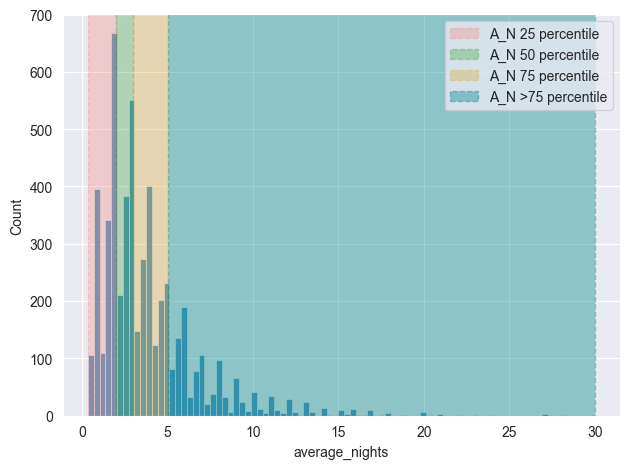

In [29]:
sns.histplot(df[(df.average_nights>0)].average_nights)
plt.axvspan(df[(df.average_nights>0)].average_nights.min(),np.percentile(df[(df.average_nights>0)].average_nights,25),linestyle='--', alpha=.3,color='salmon',label='A_N 25 percentile')
plt.axvspan(np.percentile(df[(df.average_nights>0)].average_nights,25),np.percentile(df[(df.average_nights>0)].average_nights,50),linestyle='--', alpha=.3,color='tab:green',label='A_N 50 percentile')
plt.axvspan(np.percentile(df[(df.average_nights>0)].average_nights,50),np.percentile(df[(df.average_nights>0)].average_nights,75),linestyle='--', alpha=.3,color='goldenrod',label='A_N 75 percentile')
plt.axvspan(np.percentile(df[(df.average_nights>0)].average_nights,75),df[(df.average_nights>0)].average_nights.max(),linestyle='--', alpha=.4,color='darkcyan',label='A_N >75 percentile')
plt.legend()
plt.tight_layout()
plt.show()

In [104]:
df['average_nights_b']=pd.qcut(df[(df.average_nights>0)].average_nights,q=[0,.25,.5,.75,1],labels=[1,2,3,4])
df['average_nights_b']=df['average_nights_b'].astype(float)
df['average_nights_b'].fillna(0,inplace=True)
df['average_nights_b'].value_counts()

1.0    1619
3.0    1378
4.0    1159
2.0    1146
0.0     240
Name: average_nights_b, dtype: int64

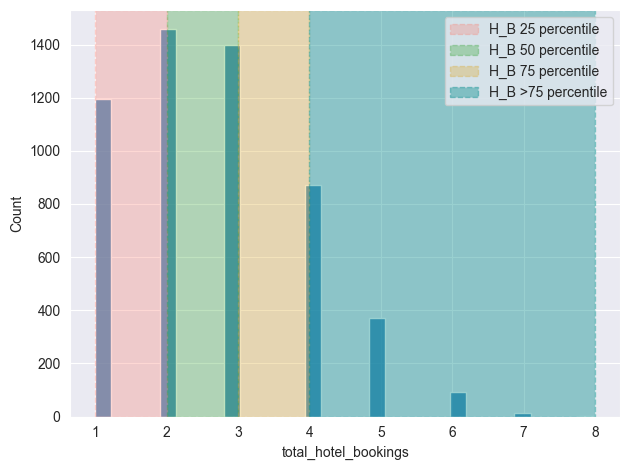

In [30]:
sns.histplot(df[(df.total_hotel_bookings>0)].total_hotel_bookings)
plt.axvspan(df[(df.total_hotel_bookings>0)].total_hotel_bookings.min(),np.percentile(df[(df.total_hotel_bookings>0)].total_hotel_bookings,25),linestyle='--', alpha=.3,color='salmon',label='H_B 25 percentile')
plt.axvspan(np.percentile(df[(df.total_hotel_bookings>0)].total_hotel_bookings,25),np.percentile(df[(df.total_hotel_bookings>0)].total_hotel_bookings,50),linestyle='--', alpha=.3,color='tab:green',label='H_B 50 percentile')
plt.axvspan(np.percentile(df[(df.total_hotel_bookings>0)].total_hotel_bookings,50),np.percentile(df[(df.total_hotel_bookings>0)].total_hotel_bookings,75),linestyle='--', alpha=.3,color='goldenrod',label='H_B 75 percentile')
plt.axvspan(np.percentile(df[(df.total_hotel_bookings>0)].total_hotel_bookings,75),df[(df.total_hotel_bookings>0)].total_hotel_bookings.max(),linestyle='--', alpha=.4,color='darkcyan',label='H_B >75 percentile')
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
df[(df.total_hotel_bookings>0)].total_hotel_bookings.describe()

count    5401.000000
mean        2.649324
std         1.293275
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         8.000000
Name: total_hotel_bookings, dtype: float64

In [32]:
df['total_hotel_bookings_b']=pd.qcut(df[(df.total_hotel_bookings>0)].total_hotel_bookings,q=quantiles,labels=[1,2,3,4])
df['total_hotel_bookings_b']=df['total_hotel_bookings_b'].astype(float)
df['total_hotel_bookings_b'].fillna(0,inplace=True)
df.total_hotel_bookings_b.value_counts()

1.0    2653
2.0    1397
3.0     873
4.0     478
0.0     141
Name: total_hotel_bookings_b, dtype: int64

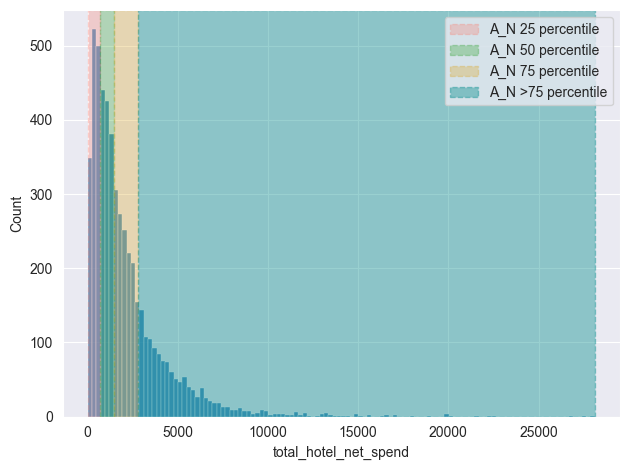

In [33]:
sns.histplot(df[(df.total_hotel_net_spend>0)].total_hotel_net_spend)
plt.axvspan(df[(df.total_hotel_net_spend>0)].total_hotel_net_spend.min(),np.percentile(df[(df.total_hotel_net_spend>0)].total_hotel_net_spend,25),linestyle='--', alpha=.3,color='salmon',label='A_N 25 percentile')
plt.axvspan(np.percentile(df[(df.total_hotel_net_spend>0)].total_hotel_net_spend,25),np.percentile(df[(df.total_hotel_net_spend>0)].total_hotel_net_spend,50),linestyle='--', alpha=.3,color='tab:green',label='A_N 50 percentile')
plt.axvspan(np.percentile(df[(df.total_hotel_net_spend>0)].total_hotel_net_spend,50),np.percentile(df[(df.total_hotel_net_spend>0)].total_hotel_net_spend,75),linestyle='--', alpha=.3,color='goldenrod',label='A_N 75 percentile')
plt.axvspan(np.percentile(df[(df.total_hotel_net_spend>0)].total_hotel_net_spend,75),df[(df.total_hotel_net_spend>0)].total_hotel_net_spend.max(),linestyle='--', alpha=.4,color='darkcyan',label='A_N >75 percentile')
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
df[(df.total_hotel_net_spend>0)].total_hotel_net_spend.describe()

count     5307.000000
mean      2166.268325
std       2321.656754
min          8.000000
25%        701.000000
50%       1464.000000
75%       2790.000000
max      28114.000000
Name: total_hotel_net_spend, dtype: float64

In [35]:
df['total_hotel_net_spend_b']=pd.qcut(df[(df.total_hotel_net_spend>0)].total_hotel_net_spend,q=quantiles,labels=[1,2,3,4])
df['total_hotel_net_spend_b']=df['total_hotel_net_spend_b'].astype(float)
df['total_hotel_net_spend_b'].fillna(0,inplace=True)
df.total_hotel_bookings_b.value_counts()

1.0    2653
2.0    1397
3.0     873
4.0     478
0.0     141
Name: total_hotel_bookings_b, dtype: int64

##### Free bags

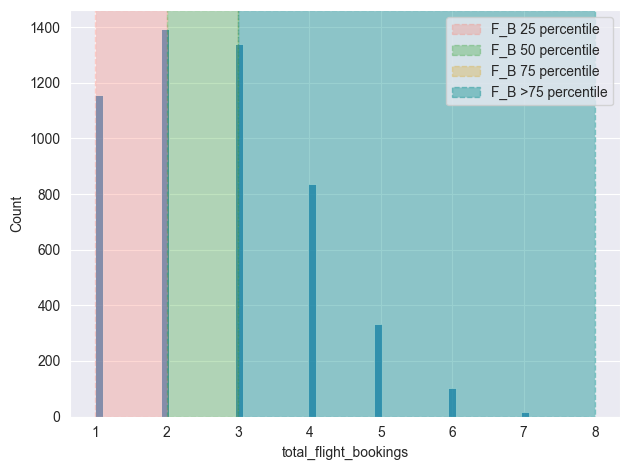

In [36]:
sns.histplot(df[(df.total_flight_bookings>0)].total_flight_bookings)
plt.axvspan(df[(df.total_flight_bookings>0)].total_flight_bookings.min(),np.percentile(df[(df.total_flight_bookings>0)].total_flight_bookings,25),linestyle='--', alpha=.3,color='salmon',label='F_B 25 percentile')
plt.axvspan(np.percentile(df[(df.total_flight_bookings>0)].total_flight_bookings,25),np.percentile(df[(df.total_flight_bookings>0)].total_flight_bookings,50),linestyle='--', alpha=.3,color='tab:green',label='F_B 50 percentile')
plt.axvspan(np.percentile(df[(df.total_flight_bookings>0)].total_flight_bookings,50),np.percentile(df[(df.total_flight_bookings>0)].total_flight_bookings,75),linestyle='--', alpha=.3,color='goldenrod',label='F_B 75 percentile')
plt.axvspan(np.percentile(df[(df.total_flight_bookings>0)].total_flight_bookings,75),df[(df.total_flight_bookings>0)].total_flight_bookings.max(),linestyle='--', alpha=.4,color='darkcyan',label='F_B >75 percentile')
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
df[(df.total_flight_bookings>0)].total_flight_bookings.describe()

count    5178.00000
mean        2.64774
std         1.30062
min         1.00000
25%         2.00000
50%         3.00000
75%         3.00000
max         8.00000
Name: total_flight_bookings, dtype: float64

In [38]:
df['total_flight_bookings_b'] = np.where(df['total_flight_bookings'] == 0, 0,
                                         np.where(df['total_flight_bookings'] == 1, 1,
                                                  np.where((2 == df['total_flight_bookings']) | (df['total_flight_bookings'] == 3), 2, 3)))
df.groupby('total_flight_bookings_b')['total_flight_bookings'].value_counts()                                                  

total_flight_bookings_b  total_flight_bookings
0                        0.0                       364
1                        1.0                      1156
2                        2.0                      1392
                         3.0                      1341
3                        4.0                       837
                         5.0                       333
                         6.0                       101
                         7.0                        16
                         8.0                         2
Name: total_flight_bookings, dtype: int64

In [39]:
df.flights_with_bags_morethan_seats.value_counts()

0.0    5074
1.0     452
2.0      14
3.0       1
4.0       1
Name: flights_with_bags_morethan_seats, dtype: int64

In [40]:
# capping vlaues more than 0
df['flights_with_bags_morethan_seats_b']=np.where(df.flights_with_bags_morethan_seats==0,0,1)
df.flights_with_bags_morethan_seats_b.value_counts()

0    5074
1     468
Name: flights_with_bags_morethan_seats_b, dtype: int64

In [41]:
df.flights_with_morethan_onebag.value_counts()

0.0    4847
1.0     654
2.0      38
3.0       2
4.0       1
Name: flights_with_morethan_onebag, dtype: int64

In [42]:
# capping vlaues more than 0
df['flights_with_morethan_onebag_b']=np.where(df.flights_with_morethan_onebag==0,0,1)
df.flights_with_morethan_onebag_b.value_counts()

0    4847
1     695
Name: flights_with_morethan_onebag_b, dtype: int64

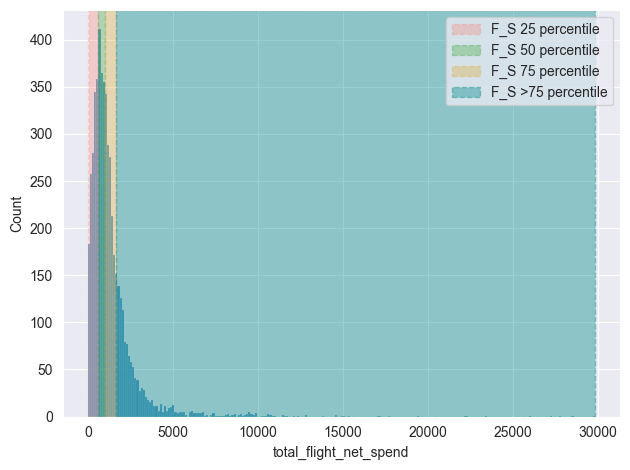

In [43]:
sns.histplot(df[(df.total_flight_net_spend>0)].total_flight_net_spend)
plt.axvspan(df[(df.total_flight_net_spend>0)].total_flight_net_spend.min(),np.percentile(df[(df.total_flight_net_spend>0)].total_flight_net_spend,25),linestyle='--', alpha=.3,color='salmon',label='F_S 25 percentile')
plt.axvspan(np.percentile(df[(df.total_flight_net_spend>0)].total_flight_net_spend,25),np.percentile(df[(df.total_flight_net_spend>0)].total_flight_net_spend,50),linestyle='--', alpha=.3,color='tab:green',label='F_S 50 percentile')
plt.axvspan(np.percentile(df[(df.total_flight_net_spend>0)].total_flight_net_spend,50),np.percentile(df[(df.total_flight_net_spend>0)].total_flight_net_spend,75),linestyle='--', alpha=.3,color='goldenrod',label='F_S 75 percentile')
plt.axvspan(np.percentile(df[(df.total_flight_net_spend>0)].total_flight_net_spend,75),df[(df.total_flight_net_spend>0)].total_flight_net_spend.max(),linestyle='--', alpha=.4,color='darkcyan',label='F_S >75 percentile')
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
df['total_flight_net_spend_b']=pd.qcut(df[(df.total_flight_net_spend>0)].total_flight_net_spend,q=quantiles,labels=[1,2,3,4])
df['total_flight_net_spend_b']=df['total_flight_net_spend_b'].astype(float)
df['total_flight_net_spend_b'].fillna(0,inplace=True)
df.total_flight_net_spend_b.value_counts()

2.0    1295
1.0    1295
3.0    1295
4.0    1295
0.0     362
Name: total_flight_net_spend_b, dtype: int64

##### Free Night With Flight

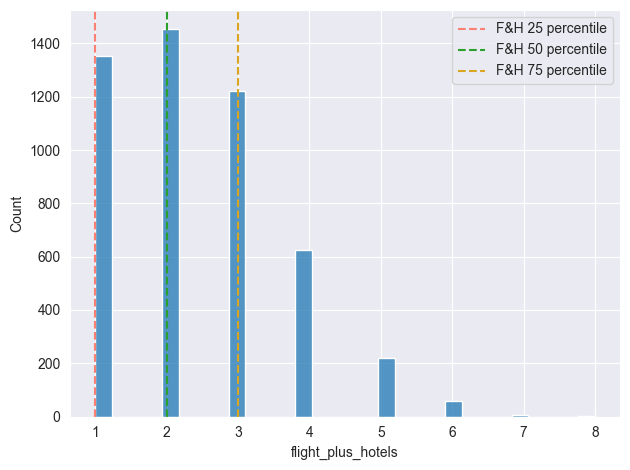

In [45]:
sns.histplot(df[(df.flight_plus_hotels>0)].flight_plus_hotels)
plt.axvline(np.percentile(df[(df.flight_plus_hotels>0)].flight_plus_hotels,25),linestyle='--', alpha=1,color='salmon',label='F&H 25 percentile')
plt.axvline(np.percentile(df[(df.flight_plus_hotels>0)].flight_plus_hotels,50),linestyle='--', alpha=1,color='tab:green',label='F&H 50 percentile')
plt.axvline(np.percentile(df[(df.flight_plus_hotels>0)].flight_plus_hotels,75),linestyle='--', alpha=1,color='goldenrod',label='F&H 75 percentile')

plt.legend()
plt.tight_layout()
plt.show()

In [46]:
df[(df.flight_plus_hotels>0)].flight_plus_hotels.describe()

count    4938.000000
mean        2.415350
std         1.219077
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: flight_plus_hotels, dtype: float64

In [47]:
df['flight_plus_hotels_b']=np.where(df.flight_plus_hotels==0,0,np.where(
    df.flight_plus_hotels==1,1,np.where(
        df.flight_plus_hotels<=3,2,3
    )
))

In [48]:
df.groupby('flight_plus_hotels_b')['flight_plus_hotels'].value_counts()

flight_plus_hotels_b  flight_plus_hotels
0                     0                      604
1                     1                     1353
2                     2                     1453
                      3                     1221
3                     4                      624
                      5                      221
                      6                       59
                      7                        6
                      8                        1
Name: flight_plus_hotels, dtype: int64

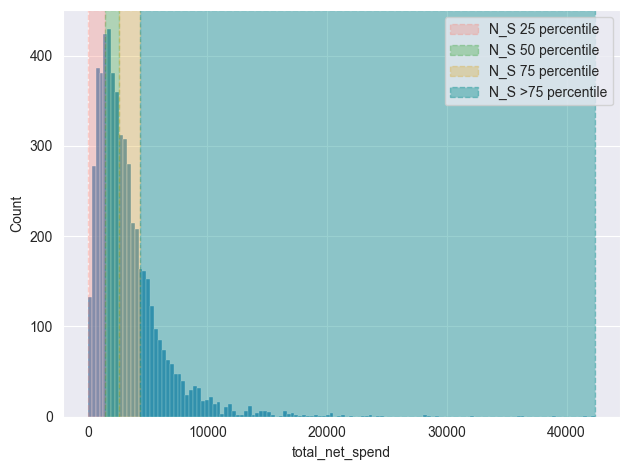

In [52]:
sns.histplot(df[(df.total_net_spend>0)].total_net_spend)
plt.axvspan(df[(df.total_net_spend>0)].total_net_spend.min(),np.percentile(df[(df.total_net_spend>0)].total_net_spend,25),linestyle='--', alpha=.3,color='salmon',label='N_S 25 percentile')
plt.axvspan(np.percentile(df[(df.total_net_spend>0)].total_net_spend,25),np.percentile(df[(df.total_net_spend>0)].total_net_spend,50),linestyle='--', alpha=.3,color='tab:green',label='N_S 50 percentile')
plt.axvspan(np.percentile(df[(df.total_net_spend>0)].total_net_spend,50),np.percentile(df[(df.total_net_spend>0)].total_net_spend,75),linestyle='--', alpha=.3,color='goldenrod',label='N_S 75 percentile')
plt.axvspan(np.percentile(df[(df.total_net_spend>0)].total_net_spend,75),df[(df.total_net_spend>0)].total_net_spend.max(),linestyle='--', alpha=.4,color='darkcyan',label='N_S >75 percentile')
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
df['total_net_spend_b']=pd.qcut(df[(df.total_net_spend>0)].total_net_spend,q=quantiles,labels=[1,2,3,4])
df['total_net_spend_b']=df['total_net_spend_b'].astype(float)
df['total_net_spend_b'].fillna(0,inplace=True)
df.total_net_spend_b.value_counts()

1.0    1386
4.0    1386
3.0    1385
2.0    1385
Name: total_net_spend_b, dtype: int64

##### Exclusive discounts

- Flights

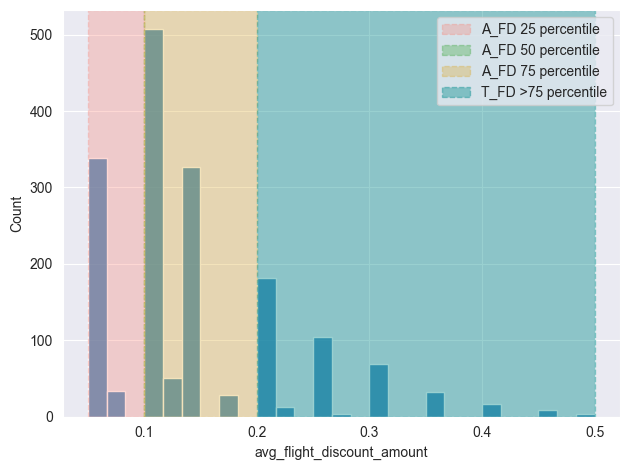

In [54]:
sns.histplot(df[(df.avg_flight_discount_amount>0)].avg_flight_discount_amount)
plt.axvspan(df[(df.avg_flight_discount_amount>0)].avg_flight_discount_amount.min(),np.percentile(df[(df.avg_flight_discount_amount>0)].avg_flight_discount_amount,25),linestyle='--', alpha=.3,color='salmon',label='A_FD 25 percentile')
plt.axvspan(np.percentile(df[(df.avg_flight_discount_amount>0)].avg_flight_discount_amount,25),np.percentile(df[(df.avg_flight_discount_amount>0)].avg_flight_discount_amount,50),linestyle='--', alpha=.3,color='tab:green',label='A_FD 50 percentile')
plt.axvspan(np.percentile(df[(df.avg_flight_discount_amount>0)].avg_flight_discount_amount,50),np.percentile(df[(df.avg_flight_discount_amount>0)].avg_flight_discount_amount,75),linestyle='--', alpha=.3,color='goldenrod',label='A_FD 75 percentile')
plt.axvspan(np.percentile(df[(df.avg_flight_discount_amount>0)].avg_flight_discount_amount,75),df[(df.avg_flight_discount_amount>0)].avg_flight_discount_amount.max(),linestyle='--', alpha=.4,color='darkcyan',label='T_FD >75 percentile')
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
df['avg_flight_discount_amount_b']=np.where(df.avg_flight_discount_amount==0,0,np.where(
    df.avg_flight_discount_amount<0.1,1,np.where(
        df.avg_flight_discount_amount<0.2,2,3
    )
))
df.avg_flight_discount_amount_b.value_counts()

0    3824
2     913
3     433
1     372
Name: avg_flight_discount_amount_b, dtype: int64

In [56]:
# Creating total discounts amount feature
df['total_amount_of_flight_discount']=df.avg_flight_discount_amount*df.total_num_of_flight_discount

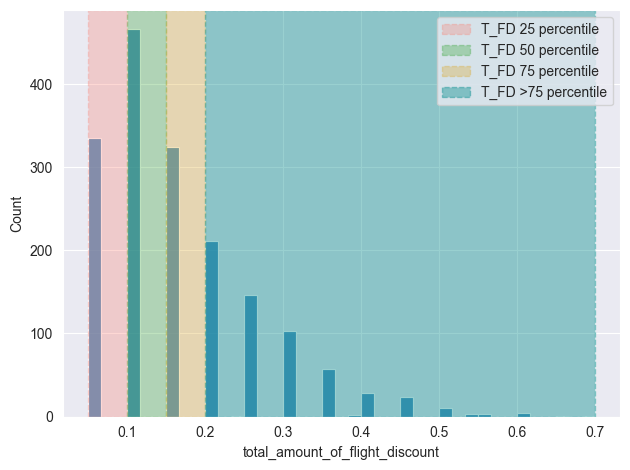

In [57]:
sns.histplot(df[(df.total_amount_of_flight_discount>0)].total_amount_of_flight_discount)
plt.axvspan(df[(df.total_amount_of_flight_discount>0)].total_amount_of_flight_discount.min(),np.percentile(df[(df.total_amount_of_flight_discount>0)].total_amount_of_flight_discount,25),linestyle='--', alpha=.3,color='salmon',label='T_FD 25 percentile')
plt.axvspan(np.percentile(df[(df.total_amount_of_flight_discount>0)].total_amount_of_flight_discount,25),np.percentile(df[(df.total_amount_of_flight_discount>0)].total_amount_of_flight_discount,50),linestyle='--', alpha=.3,color='tab:green',label='T_FD 50 percentile')
plt.axvspan(np.percentile(df[(df.total_amount_of_flight_discount>0)].total_amount_of_flight_discount,50),np.percentile(df[(df.total_amount_of_flight_discount>0)].total_amount_of_flight_discount,75),linestyle='--', alpha=.3,color='goldenrod',label='T_FD 75 percentile')
plt.axvspan(np.percentile(df[(df.total_amount_of_flight_discount>0)].total_amount_of_flight_discount,75),df[(df.total_amount_of_flight_discount>0)].total_amount_of_flight_discount.max(),linestyle='--', alpha=.4,color='darkcyan',label='T_FD >75 percentile')
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
df[(df.total_amount_of_flight_discount>0)].total_amount_of_flight_discount.describe()

count    1718.000000
mean        0.160738
std         0.103529
min         0.050000
25%         0.100000
50%         0.150000
75%         0.200000
max         0.700000
Name: total_amount_of_flight_discount, dtype: float64

In [61]:
df['total_amount_of_flight_discount_b']=np.where(df.total_amount_of_flight_discount==0,0,np.where(
    df.total_amount_of_flight_discount<.1,1,np.where(
        df.total_amount_of_flight_discount<.2,2,3)
))
df.total_amount_of_flight_discount_b.value_counts()

0    3824
2     790
3     593
1     335
Name: total_amount_of_flight_discount_b, dtype: int64

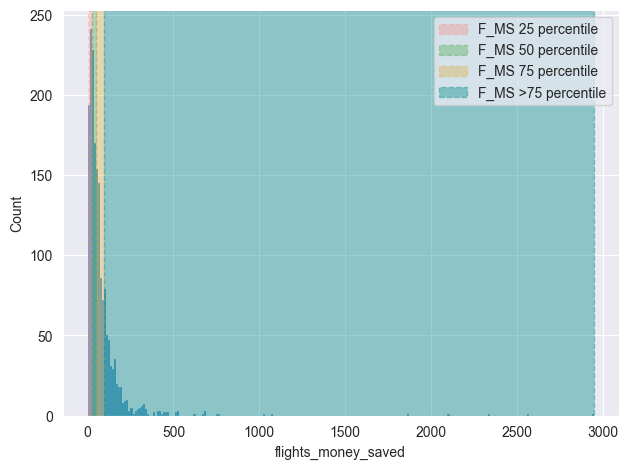

In [62]:
sns.histplot(df[(df.flights_money_saved>0)].flights_money_saved)
plt.axvspan(df[(df.flights_money_saved>0)].flights_money_saved.min(),np.percentile(df[(df.flights_money_saved>0)].flights_money_saved,25),linestyle='--', alpha=.3,color='salmon',label='F_MS 25 percentile')
plt.axvspan(np.percentile(df[(df.flights_money_saved>0)].flights_money_saved,25),np.percentile(df[(df.flights_money_saved>0)].flights_money_saved,50),linestyle='--', alpha=.3,color='tab:green',label='F_MS 50 percentile')
plt.axvspan(np.percentile(df[(df.flights_money_saved>0)].flights_money_saved,50),np.percentile(df[(df.flights_money_saved>0)].flights_money_saved,75),linestyle='--', alpha=.3,color='goldenrod',label='F_MS 75 percentile')
plt.axvspan(np.percentile(df[(df.flights_money_saved>0)].flights_money_saved,75),df[(df.flights_money_saved>0)].flights_money_saved.max(),linestyle='--', alpha=.4,color='darkcyan',label='F_MS >75 percentile')
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
df['flight_money_saved_b']=pd.qcut(df[(df.flights_money_saved>0)].flights_money_saved,q=quantiles,labels=[1,2,3,4])
df['flight_money_saved_b']=df['flight_money_saved_b'].astype(float)
df['flight_money_saved_b'].fillna(0,inplace=True)
df.flight_money_saved_b.value_counts()

0.0    3825
1.0     435
3.0     430
4.0     427
2.0     425
Name: flight_money_saved_b, dtype: int64

In [137]:
# (df.flights_with_bags_morethan_seats/df.total_flight_bookings).value_counts()

0.000000    4710
0.333333     140
0.500000     100
0.250000      98
1.000000      51
0.200000      50
0.166667      16
0.142857       5
0.666667       4
0.400000       3
0.600000       1
dtype: int64

- Hotels

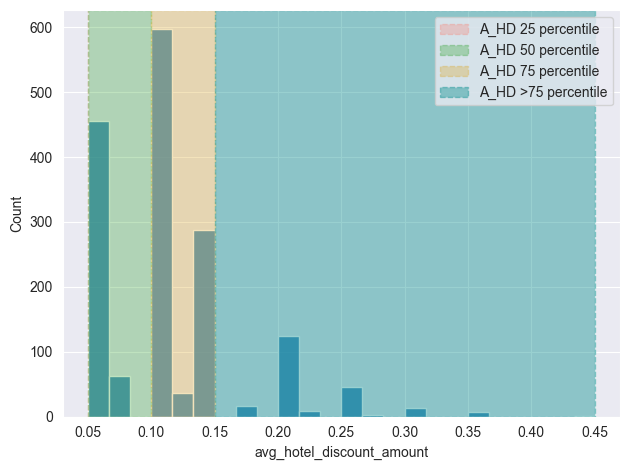

In [64]:
sns.histplot(df[(df.avg_hotel_discount_amount>0)].avg_hotel_discount_amount)
plt.axvspan(df[(df.avg_hotel_discount_amount>0)].avg_hotel_discount_amount.min(),np.percentile(df[(df.avg_hotel_discount_amount>0)].avg_hotel_discount_amount,25),linestyle='--', alpha=.3,color='salmon',label='A_HD 25 percentile')
plt.axvspan(np.percentile(df[(df.avg_hotel_discount_amount>0)].avg_hotel_discount_amount,25),np.percentile(df[(df.avg_hotel_discount_amount>0)].avg_hotel_discount_amount,50),linestyle='--', alpha=.3,color='tab:green',label='A_HD 50 percentile')
plt.axvspan(np.percentile(df[(df.avg_hotel_discount_amount>0)].avg_hotel_discount_amount,50),np.percentile(df[(df.avg_hotel_discount_amount>0)].avg_hotel_discount_amount,75),linestyle='--', alpha=.3,color='goldenrod',label='A_HD 75 percentile')
plt.axvspan(np.percentile(df[(df.avg_hotel_discount_amount>0)].avg_hotel_discount_amount,75),df[(df.avg_hotel_discount_amount>0)].avg_hotel_discount_amount.max(),linestyle='--', alpha=.4,color='darkcyan',label='A_HD >75 percentile')
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
df[(df.avg_hotel_discount_amount>0)].avg_hotel_discount_amount.describe()

count    1660.000000
mean        0.110716
std         0.057116
min         0.050000
25%         0.050000
50%         0.100000
75%         0.150000
max         0.450000
Name: avg_hotel_discount_amount, dtype: float64

In [67]:
df['avg_hotel_discount_amount_b']=np.where(df.avg_hotel_discount_amount==0,0,np.where(
    df.avg_hotel_discount_amount<0.1,1,np.where(
        df.avg_hotel_discount_amount<=0.15,2,3
    )
))
df.avg_hotel_discount_amount_b.value_counts()

0    3882
2     921
1     519
3     220
Name: avg_hotel_discount_amount_b, dtype: int64

In [68]:
# Creating total discounts amount feature
df['total_amount_of_hotel_discount']=df.avg_hotel_discount_amount*df.total_num_of_hotel_discount

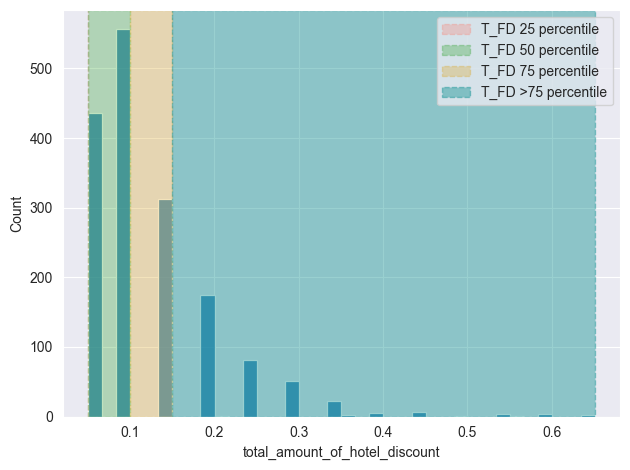

In [70]:
sns.histplot(df[(df.total_amount_of_hotel_discount>0)].total_amount_of_hotel_discount)
plt.axvspan(df[(df.total_amount_of_hotel_discount>0)].total_amount_of_hotel_discount.min(),np.percentile(df[(df.total_amount_of_hotel_discount>0)].total_amount_of_hotel_discount,25),linestyle='--', alpha=.3,color='salmon',label='T_HD 25 percentile')
plt.axvspan(np.percentile(df[(df.total_amount_of_hotel_discount>0)].total_amount_of_hotel_discount,25),np.percentile(df[(df.total_amount_of_hotel_discount>0)].total_amount_of_hotel_discount,50),linestyle='--', alpha=.3,color='tab:green',label='T_HD 50 percentile')
plt.axvspan(np.percentile(df[(df.total_amount_of_hotel_discount>0)].total_amount_of_hotel_discount,50),np.percentile(df[(df.total_amount_of_hotel_discount>0)].total_amount_of_hotel_discount,75),linestyle='--', alpha=.3,color='goldenrod',label='T_HD 75 percentile')
plt.axvspan(np.percentile(df[(df.total_amount_of_hotel_discount>0)].total_amount_of_hotel_discount,75),df[(df.total_amount_of_hotel_discount>0)].total_amount_of_hotel_discount.max(),linestyle='--', alpha=.4,color='darkcyan',label='T_HD >75 percentile')
plt.legend()
plt.tight_layout()
plt.show()

In [75]:
df['total_amount_of_hotel_discount_b']=pd.qcut(df[(df.total_amount_of_hotel_discount>0)].total_amount_of_hotel_discount,q=[0,.50,.75,1],labels=[1,2,3])
df['total_amount_of_hotel_discount_b']=df['total_amount_of_hotel_discount_b'].astype(float)
df['total_amount_of_hotel_discount_b'].fillna(0,inplace=True)
df.total_amount_of_hotel_discount_b.value_counts()

0.0    3882
1.0     992
3.0     356
2.0     312
Name: total_amount_of_hotel_discount_b, dtype: int64

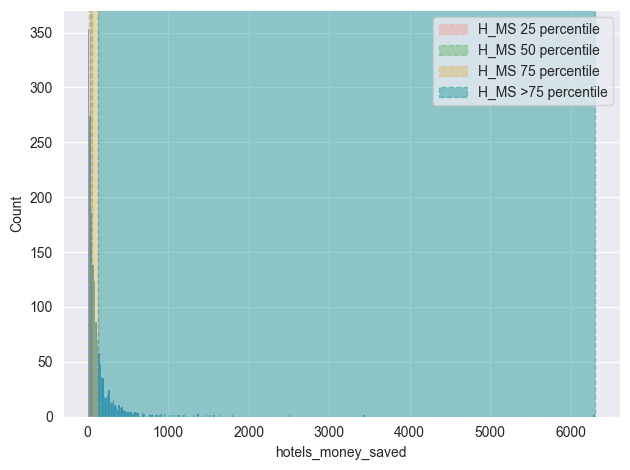

In [76]:
sns.histplot(df[(df.hotels_money_saved>0)].hotels_money_saved)
plt.axvspan(df[(df.hotels_money_saved>0)].hotels_money_saved.min(),np.percentile(df[(df.hotels_money_saved>0)].hotels_money_saved,25),linestyle='--', alpha=.3,color='salmon',label='H_MS 25 percentile')
plt.axvspan(np.percentile(df[(df.hotels_money_saved>0)].hotels_money_saved,25),np.percentile(df[(df.hotels_money_saved>0)].hotels_money_saved,50),linestyle='--', alpha=.3,color='tab:green',label='H_MS 50 percentile')
plt.axvspan(np.percentile(df[(df.hotels_money_saved>0)].hotels_money_saved,50),np.percentile(df[(df.hotels_money_saved>0)].hotels_money_saved,75),linestyle='--', alpha=.3,color='goldenrod',label='H_MS 75 percentile')
plt.axvspan(np.percentile(df[(df.hotels_money_saved>0)].hotels_money_saved,75),df[(df.hotels_money_saved>0)].hotels_money_saved.max(),linestyle='--', alpha=.4,color='darkcyan',label='H_MS >75 percentile')
plt.legend()
plt.tight_layout()
plt.show()

In [77]:
df[(df.hotels_money_saved>0)].hotels_money_saved.describe()

count    1660.000000
mean      124.161446
std       254.601175
min         2.000000
25%        23.750000
50%        59.000000
75%       131.000000
max      6300.000000
Name: hotels_money_saved, dtype: float64

In [78]:
df['hotels_money_saved_b']=pd.qcut(df[(df.hotels_money_saved>0)].hotels_money_saved,q=quantiles,labels=[1,2,3,4])
df['hotels_money_saved_b']=df['hotels_money_saved_b'].astype(float)
df['hotels_money_saved_b'].fillna(0,inplace=True)
df.hotels_money_saved_b.value_counts()

0.0    3882
2.0     426
1.0     415
4.0     412
3.0     407
Name: hotels_money_saved_b, dtype: int64

In [80]:
# Save final data
df.to_csv('data_final.csv',index=False)